In [1]:
import warnings; warnings.simplefilter('ignore')
import csv
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def loadData(fileName, inputVariabName, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:  
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    selectedVariable = dataNames.index(inputVariabName)
    inputs = [float(data[i][selectedVariable]) for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]

    return inputs, outputs


In [3]:

def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

In [4]:
def plotData(x1, y1, x2 = None, y2 = None, x3 = None, y3 = None, title = None):
    plt.plot(x1, y1, 'ro', label = 'train data')
    if (x2):
        plt.plot(x2, y2, 'b-', label = 'learnt model')
    if (x3):
        plt.plot(x3, y3, 'g^', label = 'test data')
    plt.title(title)
    plt.legend()
    plt.show()

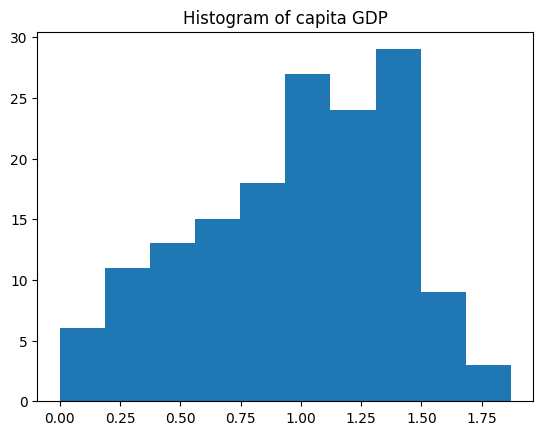

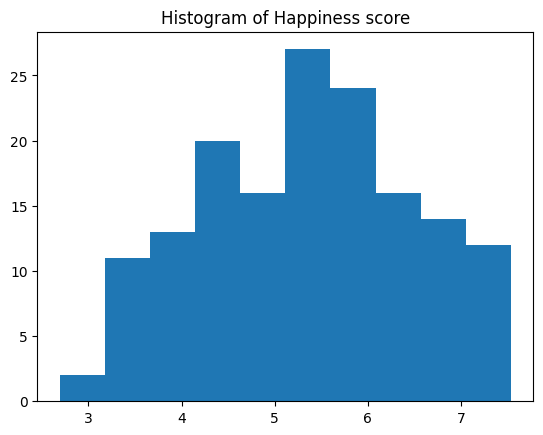

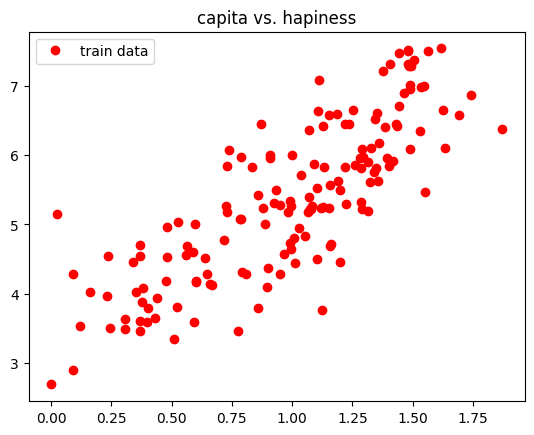

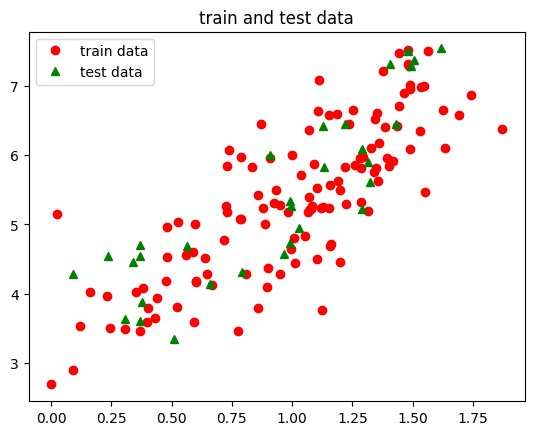

the learnt model: f(x) =  3.1994285956915123  +  2.1487678365481915  * x


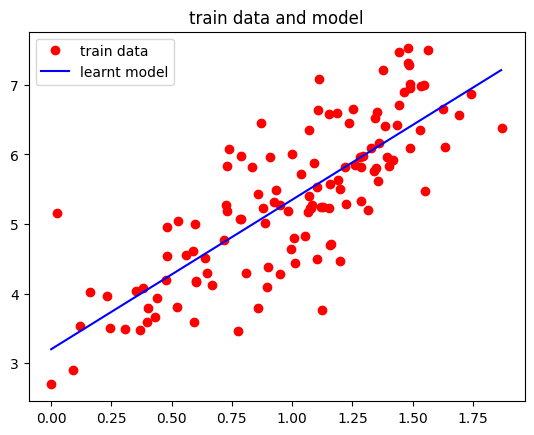

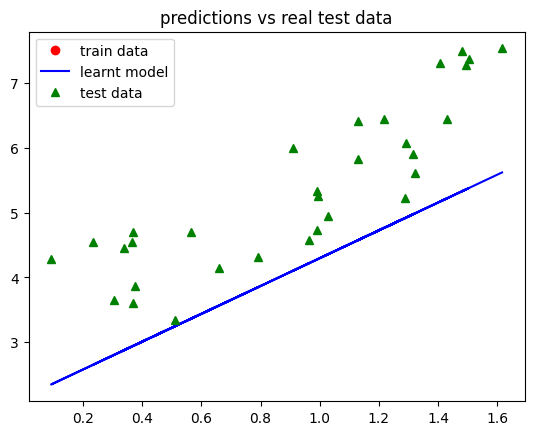

prediction error (manual):  1.9008773201208433
prediction error (tool):  1.9008773201208433


In [14]:

from p1.SGD import MySGDRegression
from sklearn.metrics import mean_squared_error
import importlib
import p1.BGD
importlib.reload(p1.BGD)
from p1.BGD import MyBGDRegression


crtDir = os.getcwd()
filePath = os.path.join(crtDir, 'data', 'world-happiness-report-2017.csv')

inputs, outputs = loadData(filePath, 'Economy..GDP.per.Capita.', 'Happiness.Score')

plotDataHistogram(inputs, 'capita GDP')
plotDataHistogram(outputs, 'Happiness score')

# check the liniarity (to check that a linear relationship exists between the dependent variable (y = happiness) and the independent variable (x = capita).)
plotData(inputs, outputs, [], [], [], [], 'capita vs. hapiness')

# split data into training data (80%) and testing data (20%)
np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace=False)
validationSample = [i for i in indexes if not i in trainSample]
trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]
validationInputs = [inputs[i] for i in validationSample]
validationOutputs = [outputs[i] for i in validationSample]

plotData(trainInputs, trainOutputs, [], [], validationInputs, validationOutputs, "train and test data")



model = 's'
# training step
xx = [[el] for el in trainInputs]
if (model == "s"):
    regressor = MySGDRegression()
else:
    regressor = MyBGDRegression()
regressor.fit(xx, trainOutputs)
w0, w1 = regressor.intercept_, regressor.coef_[0]
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')

# plot the model
noOfPoints = 1000
xref = []
val = min(trainInputs)
step = (max(trainInputs) - min(trainInputs)) / noOfPoints
for i in range(1, noOfPoints):
    xref.append(val)
    val += step
yref = [w0 + w1 * el for el in xref]
plotData(trainInputs, trainOutputs, xref, yref, [], [], title="train data and model")

# makes predictions for test data
# computedTestOutputs = [w0 + w1 * el for el in testInputs]
# makes predictions for test data
computedValidationOutputs = regressor.predict([[x] for x in validationInputs])
plotData([], [], validationInputs, computedValidationOutputs, validationInputs, validationOutputs,
         "predictions vs real test data")

# compute the differences between the predictions and real outputs
error = 0.0
for t1, t2 in zip(computedValidationOutputs, validationOutputs):
    error += (t1 - t2) ** 2
error = error / len(validationOutputs)
print("prediction error (manual): ", error)

error = mean_squared_error(validationOutputs, computedValidationOutputs)
print("prediction error (tool): ", error)